<h1 style="font-size:30px;">Reading, Displaying and Saving Images</h1>

In this introductory module, we will demonstrate how to read, display and save grayscale images. We will also introduce the most fundamental concepts associated with images which include pixel-level data and the coordinate system used to represent that data. In this notebook, we will cover the following topics:

* Reading and displaying images
* Accessing image attributes like the datatype and shape 
* Matrix representation of an image in NumPy
* Image coordinates
* Saving images


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# Tells notebook to render figures in-page.
%matplotlib inline  
from IPython.display import Image

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/8mu8erfnvqk3dzu/AABWmDJkjv-TvECMPRKlufNYa?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass


#  1. Displaying Images

There are multiple ways to display images and the choice often depends on whether we are working within a Jupyter notebook or with a python script. When using notebooks we will make use of two methods for displaying images. One method will display an image from the file system directly in the browser (notebook). In this case, the image is read and displayed using a single command. This is often helpful for simply displaying an image. Another option is to read the image into a NumPy array using OpenCV and then displaying the image using the **`imshow()`** function from matplotlib. Both methods will be demonstrated in this notebook.

Note: There is also an **`imshow()`** method in OpenCV, but this is only recommended for use within python scripts and is not recommended for use within a Jupter notebook. We will cover the use of **`imshow()`** later in the course.

## 1.1 Displaying Images Directly in the Browser

Let's start with displaying two black and white images that are different sizes. We will use the IPython **`Image()`** function to accomplish this. This is a very convenient way to read and display an image with a single command.  When displaying images directly in the browser using this method the actual size of the image is faithfully rendered.

In [ ]:
# Display 18x18 pixel image.
Image(filename='img_bw_18x18.png')

In [ ]:
# Display 64x64 pixel image.
Image(filename='img_bw_64x64.png') 

# 2. Reading Images using OpenCV

We will now use the `imread()` function in OpenCV to read images and store them in 2D NumPy arrays.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Reading images in OpenCV is very straightforward. We use the **`imread()`** function which allows us to read different types of images (JPG, PNG, etc…). You can read them as grayscale or color images. You can also read images that contain an Alpha channel.

### <font color="green">Function Syntax </font>
``` python
retval = cv2.imread(filename[, flags])
```

`retval`: Is the image if it is successfully loaded. Otherwise, it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an absolute or relative path. This is a mandatory argument.
2. `flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of `flags` available.

1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image using its original channels, which could include the alpha channel.

This is just a partial list of the most common flags. See the OpenCV documentation links below for the complete list.
### <font color="green">OpenCV Documentation</font>

[**`Imread()`**](https://docs.opencv.org/4.5.2/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
[**`ImreadModes()`**](https://docs.opencv.org/4.5.2/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

## 2.1 Read Image and Display Pixel Level Data

Let's now read the 18x18 grayscale image using `imread()` and display the pixel level data for the image. The data associated with each pixel is a representation of the pixel intensity. Most image data is stored as 8-bit unsigned integers (`uint8`), so the intensity values can range from 0 to 255. A value of 0 represents pure black and a value of 255 represents pure white. This image is considered a grayscale image even though it only contains pure black and white. 

In [ ]:
# Read image as grayscale.
bw_img = cv2.imread('img_bw_18x18.png', cv2.IMREAD_GRAYSCALE)

# Print the image data (pixel values) of a 2D NumPy array.
# Each pixel value is 8-bits in the range [0, 255].
print(bw_img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255

## 2.2 Print Image Data Attributes (shape and data type)

In [ ]:
# Print the size of image.
print('Image size is ', bw_img.shape)

# Print data-type of image.
print('Data type of image is ', bw_img.dtype)

Image size is  (18, 18)
Data type of image is  uint8


# 3. Image Coordinates

The coordinate system used to represent image pixel data is shown below. The origin of the cartesian coordinate system is in the upper left corner of the image. The width of the image is measured along the x-axis and the height along the y-axis. When this data is stored in a 2D matrix, the first index position which represents the rows of the matrix corresponds to the y-axis and the second index position corresponds to the x-axis. This coordinate system maintains the convention where the x-axis represents the horizontal direction and the y-axis the vertical direction, but when accessing the data in a numPy array the first index represents the `y` coordinate and the second index represents the `x` coordinate. This indexing specifically applies to 2D arrays, but you should be aware that many functions in OpenCV (and other libraries) may refer to a pixel coordinate in standard mathematical notation `(x,y)`. For example, as we will see in future modules, many functions in OpenCV require a pixel coordinate to be specified as `point(x,y)`. To summarize, when accessing pixel coordinates in a 2D NumPy array the indexing is always `[y,x]`, but there are other times when image coordinates are specified as `(x,y)`.
![c0-m1-Image-Coordinates.png](attachment:c0-m1-Image-Coordinates.png)

# 4. Display Image Data as an "Image" using Matplotlib

Once the image data is store in a 2D NumPy array we can display it using the matplotlib function `imshow()` as shown below. There are a couple of things to note about the displayed image below:

1. The color representation is unexpected. 

2. The displayed image is a mathematical representation of the image (essentially a "plot" of the image data). This image is only 18x18 pixels as indicated by the plot axes, yet its physical size in the browser is much larger. This is very convenient because we can display images of various sizes at an appropriate viewing scale. The size of the plot below is configurable using `plt.figure(figsize=[width, height])`.

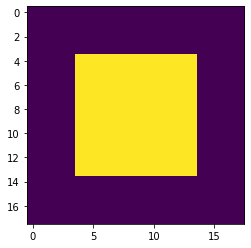

In [ ]:
# Display the image.
plt.imshow(bw_img);

### <font style="color:rgb(50,120,230)">What happened to the color? </font>
Even though the image was read as a grayscale image, it won't necessarily display in "grayscale" when using **`imshow()`**. matplotlib uses different color maps to interpret pixel intensities. To properly render this image as a grayscale image we need to specify the proper colormap. As shown below, you can specifically set a grayscale colormap by passing a 2nd (optional) argument to **`imshow()`**.

**Note**: To avoid specifying a  specific color map each time you call **`imshow()`** you can include the line below at the top of your notebook where the import statements are located which will set the color map globally. 

`matplotlib.rc('image', cmap = 'gray')`

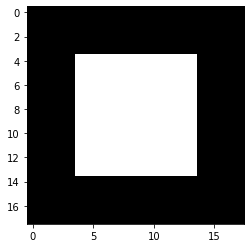

In [ ]:
# Set color map to gray scale for proper rendering.
plt.imshow(bw_img, cmap = 'gray');

# 5. Grayscale Image (another example)
Let's now consider a grayscale image that contains middle tone (gray) values. 

### <font style="color:rgb(50,120,230)">Read and display a grayscale image</font>

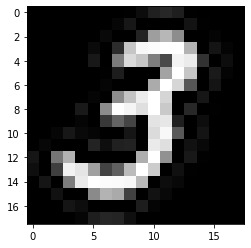

In [ ]:
# Read image as gray scale.
MNIST_3_img = cv2.imread('MNIST_3_18x18.png', cv2.IMREAD_GRAYSCALE)

# Display the image.
plt.imshow(MNIST_3_img, cmap = 'gray');

### <font style="color:rgb(50,120,230)">Print the image matrix data

In [ ]:
print(MNIST_3_img)

[[  0   0   0   0   0   0   0   0   1  12  33  39  30   1   0   0   0   0]
 [  0   0   0   0   0   0   0   6  23   0   0   0   0  19   1   0   0   0]
 [  0   0   0   0   0   0   9   0   0  35 158 183 141   0   0   4   0   0]
 [  0   0   0   0   0  10   0  44 198 248 251 255 255 179   0  20   4   0]
 [  0   0   0   0   0  24   0 124 218 198 126  74 243 235  50   0  13   0]
 [  0   0   0   0   0   0   1  29   0   0   0 163 255 198   0  26   4   0]
 [  0   0   0   0   0   0   5   0   0   0 171 255 214  86   0  20   0   0]
 [  0   0   0   0   0   5   0 140 196 236 255 213   0   0  22   0   0   0]
 [  0   0   0   0  25   0 140 255 245 223 255 201   0  41   0   1   0   0]
 [  0   0   0   0   5   0  56  99  68   0 228 231  31   0  13   0   0   0]
 [  0   0   6  23   9   5   0   0  21   0 219 248  88   0  20   0   0   0]
 [  0   7   0   0   0  35  14  33  34   0 234 223   0  17   8   0   0   0]
 [ 21   0 118 178   0   0   0   0   0 174 255 145   0  24   1   0   0   0]
 [ 14   0  63 242 229 160

# 6. Saving Images

<hr   style="border:none; height: 4px; background-color: #D3D3D3 " />

Saving images using OpenCV is very straightforward using the function **`imwrite()`**. The function saves the image to the specified file. The image format is chosen based on the filename extension (see **`imread()`** for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation below for further details).

	
### <font color="green">Function Syntax </font>
``` python
cv2.imwrite(filename, img[, params])
```

The function has **2 required arguments**:

1. `filename`: This can be an absolute or a relative path. 
2. `img`: Image or Images to be saved.

### <font color="green">OpenCV Documentation</font>

[**`imwrite()`**](https://docs.opencv.org/4.5.2/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce)
[**`imwriteFlags()`**](https://docs.opencv.org/4.5.2/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac)

<hr   style="border:none; height: 4px; background-color: #D3D3D3 " />

### <font style="color:rgb(50,120,230)">Read and display an image</font>
We will demonstrate the use of **`imwrite()`** by reading an image into a NumPy array and then writting it to the filesystem with a different extension/format. 

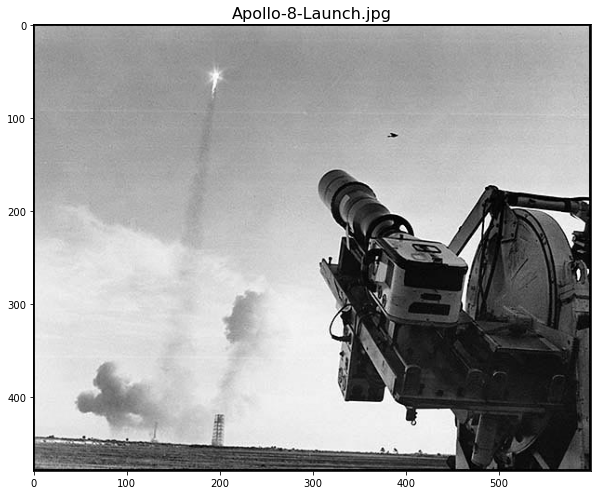

In [ ]:
image = cv2.imread('Apollo-8-Launch.jpg')
plt.figure(figsize = [10, 10])
plt.imshow(image)
plt.title('Apollo-8-Launch.jpg', fontsize = 16);

### <font style="color:rgb(50,120,230)">Save the image as a PNG file </font>

In [ ]:
# Save the image to the file system.
cv2.imwrite('Apollo-8-Launch.png', image)

True

### <font style="color:rgb(50,120,229)">Read the saved image and display it</font>

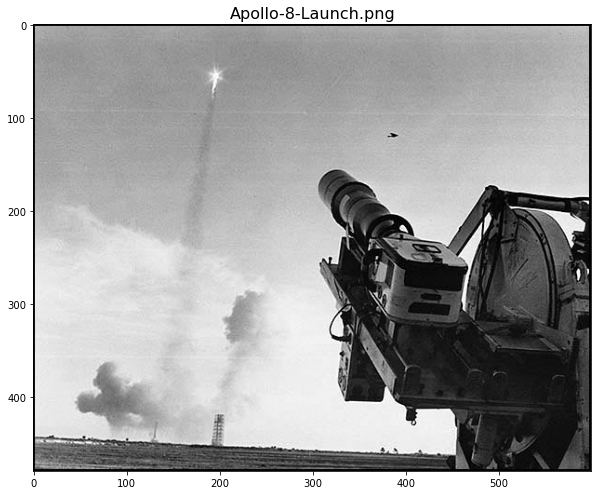

In [ ]:
image = cv2.imread('Apollo-8-Launch.png')
plt.figure(figsize = [10, 10])
plt.imshow(image)
plt.title('Apollo-8-Launch.png', fontsize = 16);

# 7. Exercise

Please complete the code in the cell below.

In [ ]:
# Read the image ('Apollo-11-launch.jpg') using OpenCV imread() as a grayscale image.
# YOUR CODE HERE
apollo_img = cv2.imread('Apollo-11-launch.jpg', cv2.IMREAD_GRAYSCALE)

# Print the image width and height.
# YOUR CODE HERE
print(apollo_img.shape)

# Display the image using matplotlib imshow().
plt.figure(figsize = [10, 10]);
# YOUR CODE HERE
plt.imshow(apollo_img, cmap = 'gray')
# Save the image as a PNG file using OpenCV imwrite().
# YOUR CODE HERE
cv2.imwrite('Apollo-8-Launch.jpg', apollo_img)

Your results should look similar to this.

![Appolo](https://opencv.org/wp-content/uploads/2021/08/c0-m1-Appolo-Exercise-01-01.png)